In [1]:
import PAA_LISA
import NOISE_LISA
import os

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
import os
from fractions import Fraction
import math
import datetime
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress')
#warnings.filterwarnings("error")
import scipy.optimize

year2sec=32536000
day2sec=year2sec/365.25
c=300000000

In [3]:
input_param = {
        'calc_method': 'Waluschka',
        'plot_on':False, #If plots will be made
        'dir_savefig': os.getcwd(), # The directory where the figures will be saved. If False, it will be in the current working directory
        'noise_check':False,
        'home':'/home/ester/git/synthlisa/', # Home directory
        'directory_imp': False,
        'num_back': 0,
        'dir_orbits': '/home/ester/git/synthlisa/orbits/', # Folder with orbit files
        'length_calc': 7, # Length of number of imported datapoints of orbit files. 'all' is also possible
        'dir_extr': 'zzzWaluschka_no_abberation', # This will be added to the folder name of the figures
        'timeunit':'Default', # The timeunit of the plots (['minutes'],['days']['years'])
        'LISA_opt':True, # If a LISA object from syntheticLISA will be used for further calculations (not sure if it works properly if this False)
        'arm_influence': True, # Set True to consider the travel time of the photons when calculating the nominal armlengths
        'tstep':False,
        'delay':True, #'Not ahead' or False
        'method':'fsolve', # Method used to solve the equation for the photon traveling time
        'valorfunc':'Function', #
        'select':'Hallion', # Select which orbit files will be imported ('all' is all)
        'test_calc':False,
        'abberation':False,
        'delay': True
        }

data_all = PAA_LISA.runfile.do_run(input_param)

['positions_timestep_days_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_10.txt', 'readable.py', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
['McKenzie_orbit_timestep_seconds_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000.txt']
['Folkner_orbit_timestep_seconds_scale_10.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Getting scale by filename:
1000.0

Getting timestep by filename:
days

Waluschka

Importing Orbit
7 datapoints
Done in 0.016811
Selected calculation method is: Waluschka

Selected calculation method is: Waluschka

Selected calculation method is: Waluschka

A

In [4]:
for k in range(0,len(data_all)/2):
    #data = PAA_res[str(k+1)]
    data = data_all[str(k+1)]
t_vec = data.t_all

In [5]:
Ndata = NOISE_LISA.Noise(data=data)

Obtaining noise
Obaining lasernoise
Obtaining shotnoise


In [6]:
import NOISE_LISA

In [7]:
wfe = NOISE_LISA.WFE(Ndata=Ndata)

In [16]:
wfe.tele_control='no control'
wfe.pupil(Nbins=10)
wfe.side = 'r'
wfe.scale = 1e-9 # Scales distance of SC

In [27]:
ps_all = []
I_all = []
for t in t_vec:
    ps_all.append(wfe.phase_rec(1,t))
    I_all.append(wfe.I_rec(1,t))
    


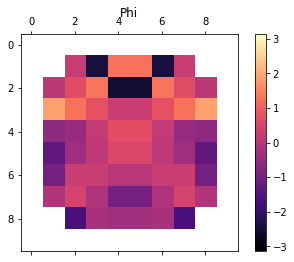

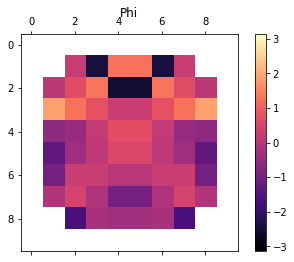

In [25]:
wfe.plot_aperture([ps_all[0]])

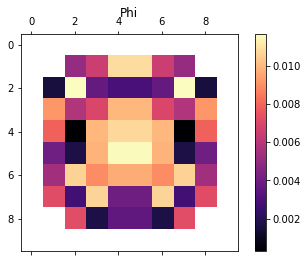

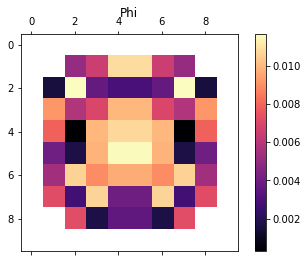

In [26]:
wfe.plot_aperture([I_all[0]],vlim=False)

In [30]:
ps_func_l = lambda i,time: np.nansum(wfe.phase_rec(i,time))

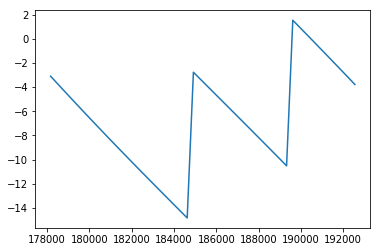

In [43]:
y=[]
i=1
t_plot = np.linspace(t_vec[2],t_vec[2]+3600*4,50)
for t in t_plot:
    y_new = ps_func_l(i,t)
    y.append(y_new)
plt.plot(t_plot,y)